In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
img=Image.open('/Users/bw/Dataset/MIT/images/viz10/000001.png')
np_img=np.array(img)[np.newaxis,...].astype(np.float32)/255

In [10]:
np_img2=np.copy(np_img)
idx=np.array([0 for i in range(15)]+[1]).reshape(1,1,1,16).astype(np.float32)
idx=tf.nn.depth_to_space(idx,4).numpy()
idx=1-np.tile(idx,[1,32,32,1])
np_img2*=idx
dum=tf.signal.rfft2d(np_img2.transpose(0,3,1,2)).numpy()

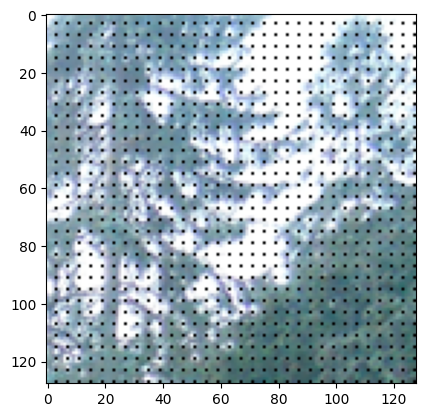

In [11]:
plt.imshow(np_img2[0])

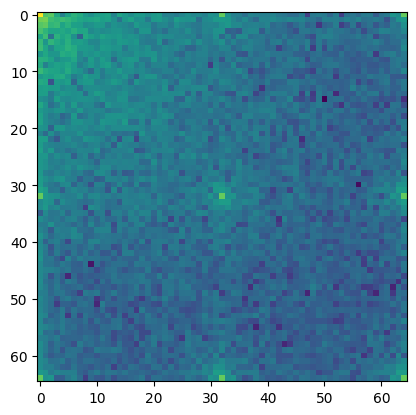

In [21]:
plt.imshow(np.log(np.abs(dum[0,0,0:65,0:65])))

In [18]:
dum.dtype

dtype('complex64')

In [22]:
class A: pass

In [23]:
self=A()

In [28]:
crop_size=128
batch_size=8
lattice_fsize=3
cfa_pattern=2
if 1:
        idx_fft=np.zeros((batch_size, 3, crop_size, crop_size//2+1), dtype=np.bool_)
        period=cfa_pattern*2
        for r in range(-(lattice_fsize//2), (lattice_fsize//2)+1):
            for c in range(-(lattice_fsize//2), (lattice_fsize//2)+1):
                if r<0: rpos=r+crop_size//period
                else: rpos=r
                if c<0: cpos=c+crop_size//period
                else: cpos=c
                idx_fft[:,:,rpos:crop_size//2+1:crop_size//period,cpos:crop_size//2+1:crop_size//period]=1
        idx_fft[:,:,:(lattice_fsize)//2+1,:(lattice_fsize//2)+1]=0

        self.tf_idx_fft=tf.cast(idx_fft, dtype=tf.bool)


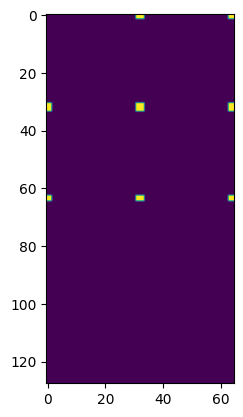

In [29]:
plt.imshow(idx_fft[0,0,:,:])

In [30]:
loss: 45.4735 - loss_fn_mse_rgb: 0.3566 - 
        loss_fn_mse_yuv: 0.1639 -
            loss_fn_dct_2d: 44.0889 
                - loss_fn_ssim: 0.9920
                    - loss_fn_fft_lattice: 0.2287
                        

SyntaxError: invalid syntax (2356280842.py, line 1)

In [31]:
0.1639 +44.0889+0.9920+0.2287


45.4735

In [59]:
if 1:
        filter_H_dir = np.zeros((5, 5,1,15), dtype=np.float32)
        filter_V_dir = np.zeros((5, 5,1,15), dtype=np.float32)
        filter_S_dir = np.zeros((5, 5,1,13), dtype=np.float32)
        filter_B_dir = np.zeros((5, 5,1,13), dtype=np.float32)
        filter_P_dir = np.zeros((5, 5,1,13), dtype=np.float32)

        for r in range(1,4):
            for c in range(5):
                filter_H_dir[r,c,0,(r-1)*5+c]=1
                filter_V_dir[c,r,0,(r-1)*5+c]=1

        for r in range(5):
            filter_S_dir[r,4-r,0,r]=1
            filter_B_dir[r,r,0,r]=1
            if r==4: continue
            filter_S_dir[r,3-r,0,r+5]=1
            filter_S_dir[r+1, 4 - r, 0, r + 9] = 1
            filter_B_dir[r,r+1,0,r+5]=1
            filter_B_dir[r+1,r,0,r+9]=1
        cnt=0
        for r in range(5):
            for c in range(5):
                if np.abs(r-2)+np.abs(c-2)>2: continue
                filter_P_dir[r,c,0,cnt]=1
                cnt+=1

In [60]:
np.sum(filter_P_dir, axis=-1)[:,:,0]

array([[0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [53]:
def show_filter(filter):
    for i in range(filter.shape[-1]):
        print(filter[:,:,0,i])

In [61]:
show_filter(filter_P_dir)

[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]

In [70]:
a=np.random.randn(1,128,128,5).astype(np.float32)
b=tf.argmin(a, axis=-1)

In [71]:
np.unique(b.numpy()), b.shape

(array([0, 1, 2, 3, 4]), TensorShape([1, 128, 128]))